In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn import metrics


%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 999)

In [3]:
#imported both data sets

In [4]:
train = pd.read_csv('../datasets/train_clean.csv')

In [5]:
test = pd.read_csv('../datasets/test_clean.csv')

In [6]:
features=['total_bsmt_sf','gr_liv_area', 'tot_bath', 'tot_outdoor_space','house_age','lot_area',
            'garage_cars']

In [7]:
X_train = train[features]
X_test = test[features]
y_train = train['saleprice']

In [8]:
#started with a regular linear regression

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
lr.coef_

array([ 3.94160051e+01,  5.54933314e+01,  7.30939091e+03,  4.89309682e+01,
       -6.23599198e+02,  4.36743110e-01,  1.88245943e+04])

In [12]:
lr.intercept_

16057.58117355872

In [13]:
cross_val_score(lr, X_train, y_train,cv=5).mean()

0.7325656796525296

In [14]:
#R2 of 0.7326. not an improvement

In [15]:
predictions = lr.predict(X_train)
train['predictions'] = predictions
residuals = train['saleprice'] - train['predictions']

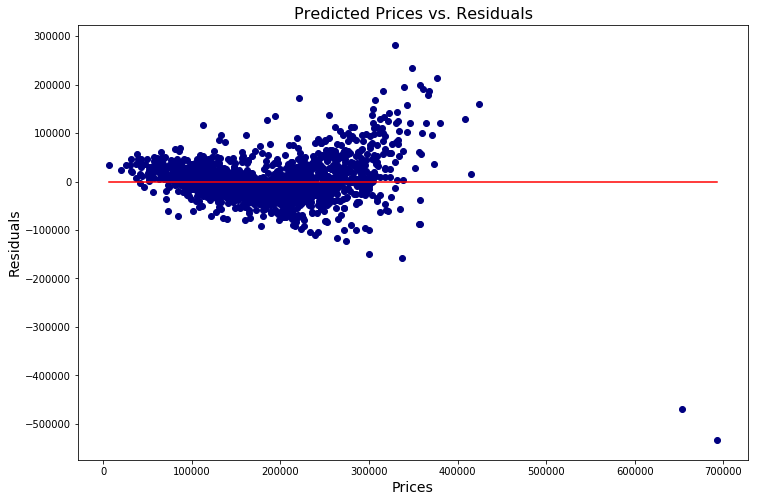

In [16]:
plt.figure(figsize = (12,8))
plt.scatter(train['predictions'],(residuals),c='navy');
plt.title('Predicted Prices vs. Residuals', size=16)
plt.xlabel('Prices', size=14)
plt.ylabel('Residuals', size=14);
plt.plot((np.min(train['predictions']), np.max(train['predictions'])),
         (np.mean(residuals), np.mean(residuals)),
         color='r');

In [17]:
#I have variables of different units so I am going to standardize them

In [18]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.7368293985201562

In [20]:
#slight improvement in R2

In [21]:
predictions = lr.predict(X_train)
train['predictions'] = predictions
residuals = train['saleprice'] - train['predictions']

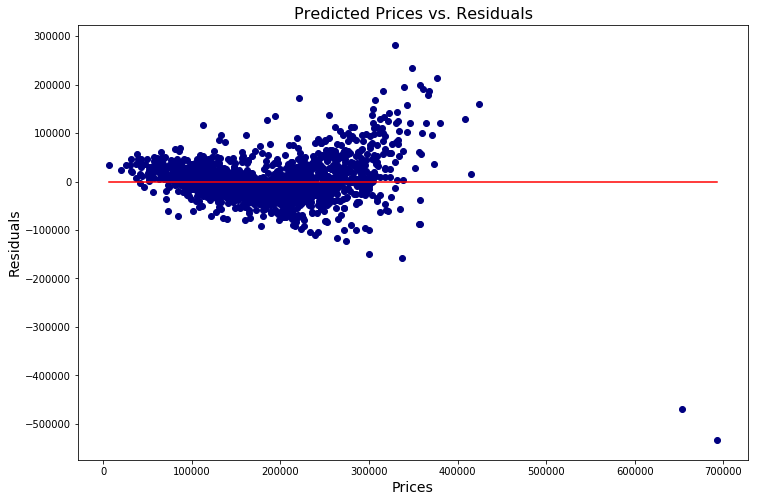

In [22]:
plt.figure(figsize = (12,8))
plt.scatter(train['predictions'],(residuals),c='navy');
plt.title('Predicted Prices vs. Residuals', size=16)
plt.xlabel('Prices', size=14)
plt.ylabel('Residuals', size=14);
plt.plot((np.min(train['predictions']), np.max(train['predictions'])),
         (np.mean(residuals), np.mean(residuals)),
         color='r');

In [23]:
#ran model against X from the test set

In [24]:
test_predict = lr.predict(X_test)

In [25]:
#created a new dataframe for me submission 

In [26]:
submission = pd.DataFrame(columns=[])

In [27]:
#submission.head()

In [28]:
#assigned data to dataframe

In [29]:
submission['Id'] = test['id']
submission['SalePrice'] = test_predict

In [31]:
submission.shape

(879, 2)

In [32]:
submission.to_csv('../submissions/submission_two.csv',index=False)